In [4]:
import logging
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
from src.models.TrainEvaluate import TrainEvaluate
from src.utils.plotting import getPositionalBoundaries
from src.visualisation.SummaryModels import SummaryModels

def printTrack(track):
    
    lat_min, lat_max, lon_min, lon_max = getPositionalBoundaries(train.validation_set.data_info['binedges'], zoom=8)
    plt.rcParams.update({'font.size': 18})

    fig, ax = plt.subplots(1,1,figsize=(10,10))

    img = mpimg.imread('figures/regions/Bornholm/Bornholm_static_map_zoom_8.png')

    ax.imshow(img, extent=[lon_min, lon_max, lat_min, lat_max])
    
    lon = track[:,1].numpy()
    lat = track[:,0].numpy()
    speed = track[:,2].numpy()
    seq_len = len(lon)
    
    points = np.array([lon, lat]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    cmap = plt.get_cmap("inferno")  # Black is start, yellow is end
    colors = [cmap(float(ii) / (seq_len - 1)) for ii in range(seq_len - 1)]
    
    for ii in range(2, seq_len - 1):
        segii = segments[ii]
        (lii,) = ax.plot(segii[:, 0], segii[:, 1], color=colors[ii])

        lii.set_solid_capstyle("round")

    ins = ax.inset_axes([0.05,0.6,0.35,0.4])
    ins.plot(speed)

    ax.set_xlabel("longitude")
    ax.set_ylabel("latitude")

In [5]:
file_name = "RegionBornholm_01062019_30092019_Fish_14400_86400_600"
#modelname = "VRNN_RegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
modelname = "VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
modelname = "VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
generative_dist = "Diagonal"

#train = TrainEvaluate(
#    file_name,
#    is_trained=True,
#    trained_model_name=modelname,
#    generative_dist=generative_dist,
#    )

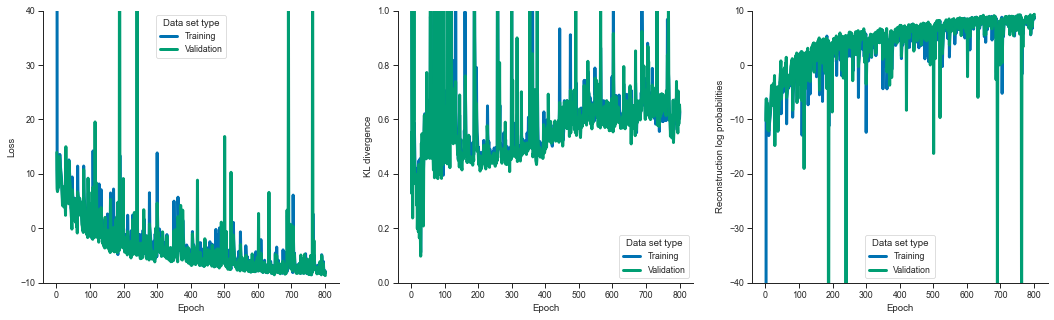

'VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal'

In [19]:
# Add plotting learning curves
modelname = "VRNN_withbiasaddedRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
summary_models = SummaryModels(file_name)
summary_models.model_name = modelname
df = summary_models.load_curves_df("withbiasadded")
summary_models.plot_curves(df, ylims=[(-10, 40), (0, 1), (-40, 10)])
summary_models.model_name

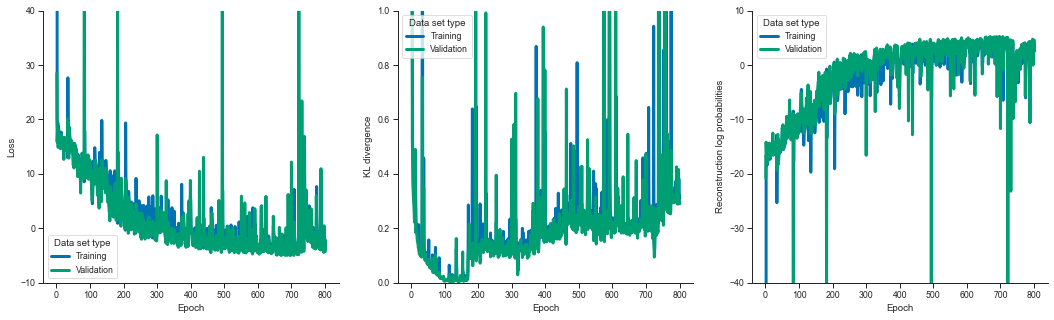

'VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal'

In [20]:
# Add plotting learning curves
modelname = "VRNN_rawspeedcourseRegionBornholm_01062019_30092019_Fish_14400_86400_600_latent100_recurrent100_batchNormFalse_Diagonal"
summary_models = SummaryModels(file_name)
summary_models.model_name = modelname
df = summary_models.load_curves_df("rawspeedcourse")
summary_models.plot_curves(df, ylims=[(-10, 40), (0, 1), (-40, 10)])
summary_models.model_name

In [3]:
val_results = train.evaluate_loop(train.validation_dataloader, train.validation_n, 1)
#loss_epoch / data_n, 
#kl_epoch / data_n,
#recon_epoch / data_n,
#all_log_px,
#all_lengths,
#all_ship_types,
#all_file_location_indices,
#all_mmsis,
#all_data_set_indices

In [4]:
recon_probs = [val_results[3][i]/val_results[4][i] for i in range(len(val_results[3]))]
recon_probs

[6.752620412342584,
 3.0714207967122396,
 -2.070234345226753,
 5.22532620395187,
 8.28946533203125,
 0.5521117701674952,
 3.3837134132922535,
 3.1557542754382624,
 8.314781986065764,
 3.008811534534801,
 3.0865748890659264,
 5.634359741210938,
 2.5954461097717285,
 2.626943487870066,
 2.969548185106734,
 7.814538230358715,
 2.626522179805871,
 8.38834950621699,
 3.502159787897478,
 3.056947496202257,
 8.227106768385807,
 3.212836589288274,
 7.555990467900815,
 5.530529265708112,
 3.4853359315453507,
 8.152198631446678,
 3.7128930993982263,
 2.9694655085184487,
 7.892237703565141,
 8.35283564178037,
 1.2465541047869988,
 7.452726295526079,
 2.6620978756227354,
 2.9090821402413503,
 8.053652036440122,
 7.9122374207823425,
 0.412721777861973,
 2.9371095687624007,
 2.1689625790244653,
 7.942873672700264,
 3.4807322668650795,
 3.8495985531637853,
 7.760481713523327,
 8.18505859375,
 8.096841025185752,
 4.03046626835079,
 7.822498590173856,
 7.266497418597028,
 2.8927886962890623,
 0.3243115

In [18]:
idx = np.argmin(recon_probs)
idx = 36
print(idx)
print(val_results[3][idx])

36
21.87425422668457


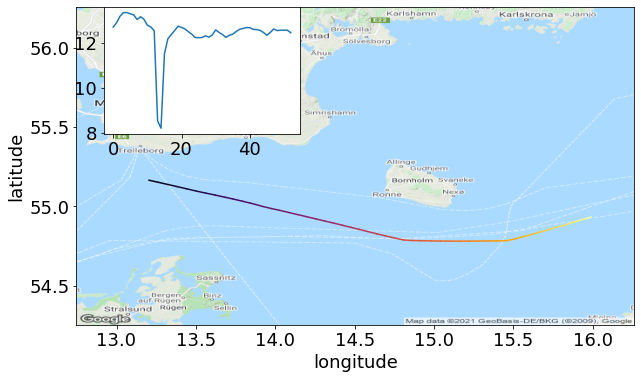

In [19]:
_, _, _, _, _, _, inputs, target = train.validation_set[idx]
start = train.validation_set.get_startpos(idx)[:2]

#track = torch.cat([start.unsqueeze(0), target], dim=0)
#track = torch.cumsum(track, dim=0)

track = torch.cat([start.unsqueeze(0), target[:,:2]], dim=0)
track = torch.cumsum(track, dim=0)
track = torch.cat([track[1:,:], target[:,2:]],dim=1)

printTrack(track)

49.734469175338745


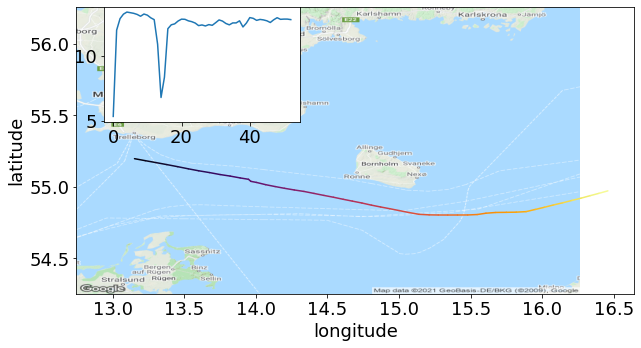

In [20]:
recon = train.track_reconstructions(train.validation_set, idx)
log_prob = recon['Reconstruction log probability']
recon = recon['Reconstruction']

#recon_track = torch.tensor(recon[['Latitude','Longitude','Speed','Course']].values)
#recon_track = torch.cat([start.unsqueeze(0), recon_track], dim=0)
#recon_track = torch.cumsum(recon_track, dim=0)

recon_track = torch.cat([start.unsqueeze(0), torch.tensor(recon[['Latitude','Longitude']].values)], dim=0)
recon_track = torch.cumsum(recon_track, dim=0)
recon_track = torch.cat([recon_track[1:,:], torch.tensor(recon[['Speed','Course']].values)],dim=1)

print(sum(log_prob))
printTrack(recon_track)

In [12]:
print(target)

tensor([[ 1.2760e-02,  3.5641e-02,  3.4000e+00, -9.5025e+01],
        [ 2.5730e-02,  1.5604e-02, -4.7000e-01, -3.6260e+01],
        [ 2.4441e-02, -1.2344e-02, -3.0000e-02,  3.1627e+02],
        [ 1.5224e-02, -2.5256e-02, -9.5239e-02, -1.8705e+01],
        [ 6.7253e-03, -3.0846e-02,  6.6667e-02, -3.4600e+01],
        [ 2.5558e-04, -4.9052e-02, -4.5008e+00, -6.7392e+01],
        [-4.5776e-05, -1.7805e-03, -2.9420e+00, -5.5775e+01],
        [-6.3934e-03, -2.6170e-02,  3.3815e+00,  5.9724e+01],
        [-6.3934e-03, -2.6170e-02,  3.3815e+00,  5.9724e+01],
        [-1.1711e-03, -3.0353e-02, -4.0817e+00,  5.4783e+00],
        [ 5.2643e-04, -1.1333e-02, -1.4957e+00,  5.6490e+00],
        [ 2.1515e-03, -1.2776e-02,  5.2381e-02,  1.2448e+01],
        [ 4.4518e-03, -1.9995e-02, -1.2667e-01, -6.6833e-03],
        [ 9.2316e-04, -4.0817e-03, -3.4000e-01, -6.5600e+00],
        [ 9.3155e-03, -1.7302e-02,  1.6667e-01,  1.9700e+01],
        [ 9.3193e-03, -1.7303e-02,  1.6667e-01,  1.9700e+01],
        

In [13]:
print(torch.tensor(recon[['Longitude','Latitude','Speed','Course']].values))

tensor([[-7.4593e-04,  5.7967e-03,  4.1428e-01, -8.2987e+00],
        [ 3.1424e-02,  1.5959e-02, -1.7520e-01, -1.9156e-02],
        [ 9.7786e-03,  2.3064e-02,  3.2564e-01, -5.2098e+00],
        [-2.3545e-02,  1.9367e-02, -6.3957e-03,  5.3761e-01],
        [-2.9954e-02,  7.9216e-03, -1.0550e-01, -2.7939e-01],
        [-1.6661e-02,  2.7693e-03,  3.3824e-01, -6.8611e+00],
        [-7.5238e-03, -1.1900e-03,  2.7425e-01, -2.4238e+00],
        [ 1.7986e-03, -6.2132e-04,  2.0518e-01, -1.6524e+00],
        [-2.3870e-02, -6.1988e-03,  5.4132e-02, -1.6565e+00],
        [-3.3612e-02, -7.1052e-03,  1.8678e-01, -2.1382e+00],
        [-8.2941e-03,  1.5133e-03,  6.2337e-04, -4.7616e-01],
        [-7.4173e-03,  2.1897e-04, -6.1740e-03,  3.7253e-02],
        [-9.2710e-03,  3.1178e-03, -3.4626e-03,  8.1213e-03],
        [-1.3233e-02,  4.2380e-03, -4.2741e-02, -4.7961e-02],
        [-5.4543e-03, -3.0475e-04, -6.6330e-03,  3.3332e-02],
        [-7.2713e-03,  9.2872e-03, -1.0488e-01, -8.1098e-02],
        

In [15]:
recon

,Longitude,Latitude,Speed,Course,Longitude sigma,Latitude sigma,Speed sigma,Course sigma
0,-0.000746,0.005797,0.414277,-8.298659,0.017877,0.011267,2.711657,133.792144
1,0.031424,0.015959,-0.175198,-0.019156,0.013646,0.006562,1.451397,61.141681
2,0.009779,0.023064,0.325636,-5.209836,0.016718,0.012005,3.333820,171.214937
3,-0.023545,0.019367,-0.006396,0.537606,0.010884,0.005401,0.143475,62.068078
4,-0.029954,0.007922,-0.105497,-0.279391,0.006899,0.003996,0.552086,54.756245
5,-0.016661,0.002769,0.338237,-6.861053,0.014815,0.007471,4.157366,164.174914
6,-0.007524,-0.001190,0.274253,-2.423821,0.007672,0.003573,2.233855,67.837791
7,0.001799,-0.000621,0.205184,-1.652371,0.006176,0.003269,2.173980,76.172812
8,-0.023870,-0.006199,0.054132,-1.656497,0.013925,0.006055,2.012039,43.381710
9,-0.033612,-0.007105,0.186779,-2.138197,0.018072,0.007872,2.821302,61.302284
